In [194]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [195]:
# Load data
df = pd.read_csv('normalized_spotify_data.csv')
df.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,key_A#,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,3,2023,6,22,0.350687,0.666667,0.593499,0.056410,0.900552,0.028090,...,False,False,False,False,False,False,True,False,False,False
1,2,2023,2,10,0.464774,0.641026,0.795403,0.051282,0.591160,0.016854,...,False,False,False,False,False,False,False,False,False,False
2,3,2022,6,24,0.698385,1.000000,0.896865,0.194872,0.000000,0.011236,...,False,False,False,True,False,False,False,False,False,False
3,1,2023,7,14,0.383448,0.923077,0.340803,0.184615,0.176796,0.087079,...,False,False,True,False,False,False,False,False,False,False
4,1,2023,7,7,0.225500,0.615385,0.481726,0.164103,0.513812,0.022472,...,False,False,False,False,False,False,False,False,False,True


In [196]:
# Dimensions
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 424
Number of columns: 32


In [197]:
# Define features and target
y = df['streams']  # Target variable
X = df.drop('streams', axis=1)  # Features (song attributes)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [198]:
# --- Linear Regression Model ---
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lin_reg = lin_reg.predict(X_test_scaled)

# Evaluate Linear Regression model
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lin_reg):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lin_reg):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_lin_reg):.2f}")

Linear Regression Model Evaluation:
Mean Absolute Error: 0.06
Mean Squared Error: 0.01
R² Score: 0.53


In [199]:
# --- Gradient Boosting Model ---
grad_boost = GradientBoostingRegressor(random_state=42)
grad_boost.fit(X_train_scaled, y_train)

# Make predictions
y_pred_grad_boost = grad_boost.predict(X_test_scaled)

# Evaluate Gradient Boosting model
print("\nGradient Boosting Model Evaluation:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_grad_boost):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_grad_boost):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_grad_boost):.2f}")


Gradient Boosting Model Evaluation:
Mean Absolute Error: 0.04
Mean Squared Error: 0.00
R² Score: 0.79


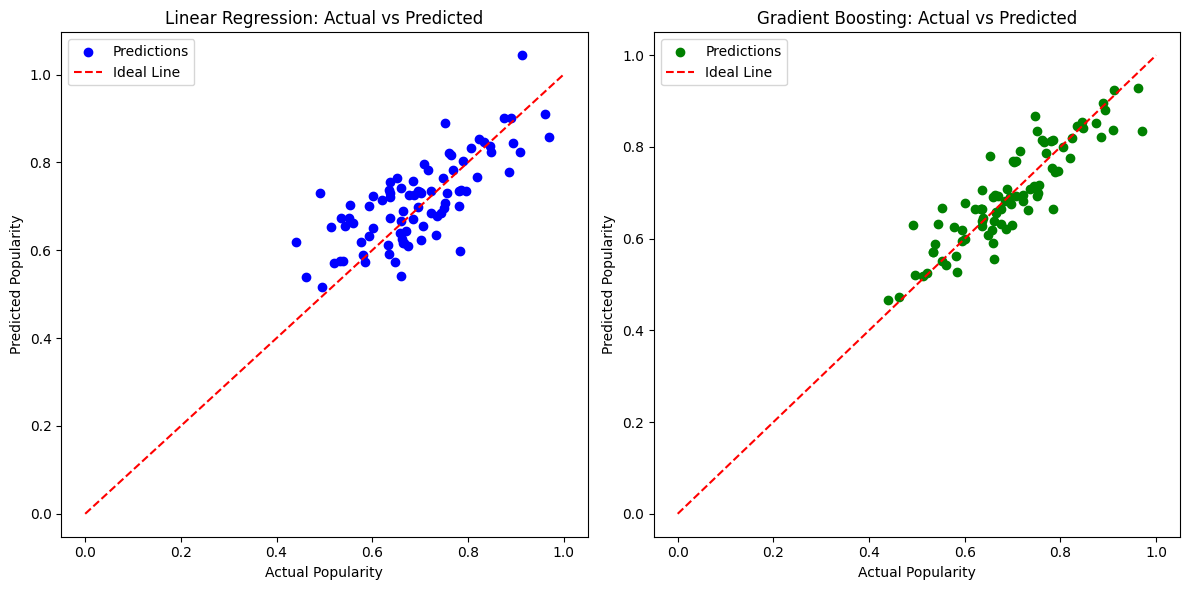

In [200]:
# --- Visual Comparison ---
# Plotting actual vs predicted values for both models

plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin_reg, color='blue', label='Predictions')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Ideal Line')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.legend()

# Gradient Boosting
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_grad_boost, color='green', label='Predictions')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Ideal Line')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.legend()

plt.tight_layout()
plt.show()

In [201]:
# # Root mean squared error without instrumentalness_%
X_without_instrumentalness = X.drop(columns=['instrumentalness_%'])

X_train, X_test, y_train, y_test = train_test_split(X_without_instrumentalness, y, test_size=0.2, random_state=42)

model_without = GradientBoostingRegressor(random_state=42)
model_without.fit(X_train, y_train)

y_pred_without = model_without.predict(X_test)
rmse_without = mean_squared_error(y_test, y_pred_without, squared=False)
print(f"RMSE without instrumentalness_%: {rmse_without}")


RMSE without instrumentalness_%: 0.052727387922689925


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [202]:
# Root mean squared error with instrumentalness_%
rmse_with = mean_squared_error(y_test, y_pred_grad_boost, squared=False)
print(f"RMSE with instrumentalness_%: {rmse_with}")

RMSE with instrumentalness_%: 0.052562341195632765


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [203]:
# Feature importance from the Gradient Boosting Model
feature_importances = pd.Series(grad_boost.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

in_spotify_playlists    0.485966
released_year           0.167727
in_spotify_charts       0.094173
in_apple_playlists      0.042135
released_month          0.035693
in_deezer_playlists     0.028116
danceability_%          0.024651
liveness_%              0.022155
in_apple_charts         0.019459
valence_%               0.017329
released_day            0.015020
artist_count            0.011412
in_shazam_charts        0.010823
energy_%                0.007908
bpm                     0.006799
acousticness_%          0.005043
speechiness_%           0.003332
key_C#                  0.001009
key_G#                  0.000506
key_F                   0.000465
mode                    0.000164
key_G                   0.000070
in_deezer_charts        0.000028
key_D                   0.000016
key_A#                  0.000000
key_A                   0.000000
key_D#                  0.000000
key_E                   0.000000
instrumentalness_%      0.000000
key_F#                  0.000000
key_B     

to do:

*   add accuracy score visualization for classifiers
*   List item



